<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_nitrousoxide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nitrous Oxide (N₂O)**

**Lachgas (N₂O) als Biosignature 🌱**
- Entsteht durch den mikrobiellen **Stickstoffkreislauf**.
- Hat nur sehr wenige bekannte abiotische Entstehungsmechanismen.

In [14]:
!pip install pyscf geometric py3Dmol -q
import numpy as np
import py3Dmol
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian, dft, tddft, mp, cc
from pyscf.geomopt.geometric_solver import optimize

In [17]:
# Define molecule
mol = gto.Mole()
mol.atom = '''
    N  0.00000000  0.00000000  -1.25324312
    N  0.00000000  0.00000000  -0.12244312
    O  0.00000000  0.00000000   1.06565688
'''

# Name
molecule = 'Nitrous Oxide (N₂O)'

In [ ]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'cc-pvdz' # Alternative basis set: sto-3g, cc-pvdz,6-31G
mol.symmetry = True
mol.spin = 0          # All 16 valence electrons are paired in the stable ground state. It is a closed-shell singlet molecule
mol.build()

In [19]:
print("-" * 20)
print(f"{molecule} molecule symmetry:")
print(f" Top group: {mol.topgroup}")
print(f" Group name: {mol.groupname}")
print("-" * 20)

--------------------
Nitrous Oxide (N₂O) molecule symmetry:
 Top group: Coov
 Group name: Coov
--------------------


Point Group Symmetry
* **Shape:** Linear, but asymmetric (N-N-O).
* **Symmetry Operations:** An infinite rotation axis ($C_\infty$) along the molecular axis and an infinite number of vertical mirror planes ($\sigma_v$) that contain the $C_\infty$ axis. Unlike a symmetric linear molecule like CO₂, it lacks a horizontal mirror plane ($\sigma_h$) and an inversion center ($i$).
* **Point Group:** **$C_{\infty v}$**

In [20]:
# 3D Molecular Geometry Visualization (takes molecule defined in `mol.build()`)
bohr_to_ang = 0.529177249                    # Convert coordinates from Bohr to Angstrom
xyz_string = f"{mol.natm}\n\n"               # Create XYZ string with proper formatting, two newlines after atom count
for i in range(mol.natm):
    coord = mol.atom_coord(i) * bohr_to_ang  # Convert to Angstrom
    xyz_string += f"{mol.atom_symbol(i)} {coord[0]:.6f} {coord[1]:.6f} {coord[2]:.6f}\n"
view = py3Dmol.view(width=600, height=400)   # Create viewer
view.addModel(xyz_string, 'xyz')             # Add molecule
view.setStyle({'stick': {'radius': 0.15},    # Apply styling
               'sphere': {'radius': 0.3}})
# Add labels for atoms
view.addPropertyLabels("atom", "", {'fontSize': 12, 'fontColor': 'black',
                                    'showBackground': True,
                                    'backgroundColor': 'white'})
view.setBackgroundColor('white')             # Set background and zoom
view.zoomTo()
print("- - - 3D Molecular Geometry Visualization can not be displayed in offline mode on Github - - -")
view  # # In Colab, the molecule will display automatically. If not displaying, you might need to explicitly call this for IPython widget

- - - 3D Molecular Geometry Visualization can not be displayed in offline mode on Github - - -


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [5]:
# Ground State Energy with Hartree-Fock (Slater Determinant)
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -183.694957080086


np.float64(-183.69495708008623)

converged SCF energy = -183.694957080086


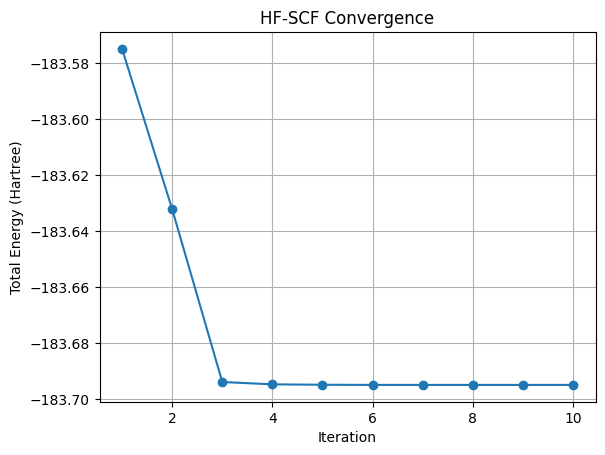

Ground state energy for Nitrous Oxide (N₂O): -183.69495708008634 Hartree


In [6]:
# Visualization of calculation process (Hartree-Fock)
mf = scf.RHF(mol)                         # Set method
conv_data = []                            # Store convergence data
def callback(envs):                       # Callback function to collect convergence information
    conv_data.append(envs['e_tot'])       # Captures energy values at each iteration to track process
mf.callback = callback                    # Set callback directly on the mf object
energy = mf.kernel()                      # Perform HF calculation
energies = conv_data                      # Extract energy values
iterations = range(1, len(energies) + 1)  # Extract iteration numbers
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()
print(f"Ground state energy for {molecule}: {energy} Hartree")

In [8]:
# Ground State Energy with DFT (Kohn-Sham)
mf = dft.RKS(mol)
mf.xc = 'B3LYP'    # Exchange-correlation functional
mf.kernel()

converged SCF energy = -184.678593578276


np.float64(-184.67859357827564)

In [9]:
# Ground State Energy with Møller-Plesset Perturbation Theory (Post Hartree Fock)
mf = scf.RHF(mol)
mf.kernel()
mp2 = mp.MP2(mf) # MP2 single point energy calculation
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -183.694957080086
E(MP2) = -184.22928922241  E_corr = -0.534332142324244
E(SCS-MP2) = -184.204888933493  E_corr = -0.509931853407102
MP2 energy: -0.5343321423242438 Hartree


In [10]:
# Ground State Energy with Coupled Cluster (Post Hartree Fock)
mf = scf.RHF(mol)                  # Perform a HF-SCF calculation to obtain the reference wavefunction
hf_energy = mf.kernel()
ccsd_calc = cc.CCSD(mf)            # Perform a Coupled Cluster calculation
ccsd_energy = ccsd_calc.kernel()
ccsd_t_energy = ccsd_calc.ccsd_t() # (Optional) Include perturbative triple excitations (CCSD(T))

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
#print(f"HF-SCF energy: {hf_energy} Hartree")
#print(f"CCSD energy: {ccsd_energy} Hartree")
#print(f"CCSD(T) energy: {ccsd_energy + ccsd_t_energy} Hartree")

converged SCF energy = -183.694957080086
E(CCSD) = -184.2150382152573  E_corr = -0.5200811351710035
CCSD(T) correction = -0.0243861538938388


In [11]:
# Excited electronic states
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -183.694957080086
Excited State energies (eV)
[6.51485333 6.92561001 6.92561001]

** Singlet excitation energies and oscillator strengths **
Excited State   1:  ???      6.51485 eV    190.31 nm  f=0.0000
Excited State   2:  ???      6.92561 eV    179.02 nm  f=0.0000
Excited State   3:  E2y      6.92561 eV    179.02 nm  f=0.0000


In [12]:
# Geometry Optimization (in Angstroms) with HF or DFT
# Take molecule including basis set defined from `mol.build()`
mf = dft.RKS(mol)     # Perform geometry optimization using DFT (Restricted Kohn-Sham)
mf.xc = 'b3lyp'       # Define the exchange-correlation functional
mol_eq = optimize(mf)
print(mol_eq.atom_coords())

geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-ad331fa6-2a1e-419b-a3c9-09ab79f4ba44.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000  -1.253243    0.000000  0.000000  0.000000
   N   0.000000   0.000000  -0.122443    0.000000  0.000000  0.000000
   O   0.000000   0.000000   1.065657    0.000000  0.000000 -0.000000
converged SCF energy = -183.694957080088
--------------- SymAdaptedRHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000000000    -0.1170284900
1 N     0.0000000000     0.0000000000     0.0821465490
2 O     0.0000000000     0.0000000000     0.0348819409
----------------------------------------------
cycle 1: E = -183.69495708  dE = -183.695  norm(grad) = 0.147175


Step    0 : Gradient = 8.497e-02/1.170e-01 (rms/max) Energy = -183.6949570801
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 2.50000e-01 1.11037e+00 1.48978e+00



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000  -1.219989    0.000000  0.000000  0.033254
   N  -0.000000   0.000000  -0.130758   -0.000000  0.000000 -0.008315
   O   0.000000   0.000000   1.040718    0.000000  0.000000 -0.024939
converged SCF energy = -183.700054965247
--------------- SymAdaptedRHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000000000     0.0076737618
1 N     0.0000000000     0.0000000000    -0.0075968778
2 O     0.0000000000     0.0000000000    -0.0000768840
----------------------------------------------
cycle 2: E = -183.700054965  dE = -0.00509789  norm(grad) = 0.0107984


Step    1 : Displace = 2.447e-02/3.325e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 6.234e-03/7.674e-03 (rms/max) E (change) = -183.7000549652 (-5.098e-03) Quality = 0.991
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 2.50000e-01 1.10427e+00 1.58613e+00



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000  -1.221706    0.000000  0.000000 -0.001716
   N  -0.000000   0.000000  -0.129914   -0.000000  0.000000  0.000844
   O   0.000000   0.000000   1.041591    0.000000  0.000000  0.000873
converged SCF energy = -183.700071410217
--------------- SymAdaptedRHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000000000    -0.0008421655
1 N     0.0000000000     0.0000000000     0.0001571936
2 O     0.0000000000     0.0000000000     0.0006849719
----------------------------------------------
cycle 3: E = -183.70007141  dE = -1.6445e-05  norm(grad) = 0.00109688


Step    2 : Displace = 1.214e-03/1.716e-03 (rms/max) Trust = 1.414e-01 (+) Grad = 6.333e-04/8.422e-04 (rms/max) E (change) = -183.7000714102 (-1.644e-05) Quality = 0.886
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 2.50000e-01 1.08698e+00 1.78982e+00



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   N   0.000000   0.000000  -1.221455    0.000000  0.000000  0.000251
   N  -0.000000   0.000000  -0.129893   -0.000000  0.000000  0.000022
   O   0.000000   0.000000   1.041318    0.000000  0.000000 -0.000273
converged SCF energy = -183.700071830924
--------------- SymAdaptedRHF_Scanner gradients ---------------
         x                y                z
0 N     0.0000000000     0.0000000000    -0.0000067294
1 N     0.0000000000     0.0000000000    -0.0001564982
2 O     0.0000000000     0.0000000000     0.0001632276
----------------------------------------------
cycle 4: E = -183.700071831  dE = -4.20708e-07  norm(grad) = 0.00022623


Step    3 : Displace = 2.143e-04/2.727e-04 (rms/max) Trust = 2.000e-01 (+) Grad = 1.306e-04/1.632e-04 (rms/max) E (change) = -183.7000718309 (-4.207e-07) Quality = 1.128
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 2.50000e-01 1.08698e+00 1.78982e+00
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 2.058 seconds


[[ 0.          0.         -2.3082147 ]
 [ 0.          0.         -0.24546154]
 [ 0.          0.          1.96780567]]


converged SCF energy = -183.694957080086


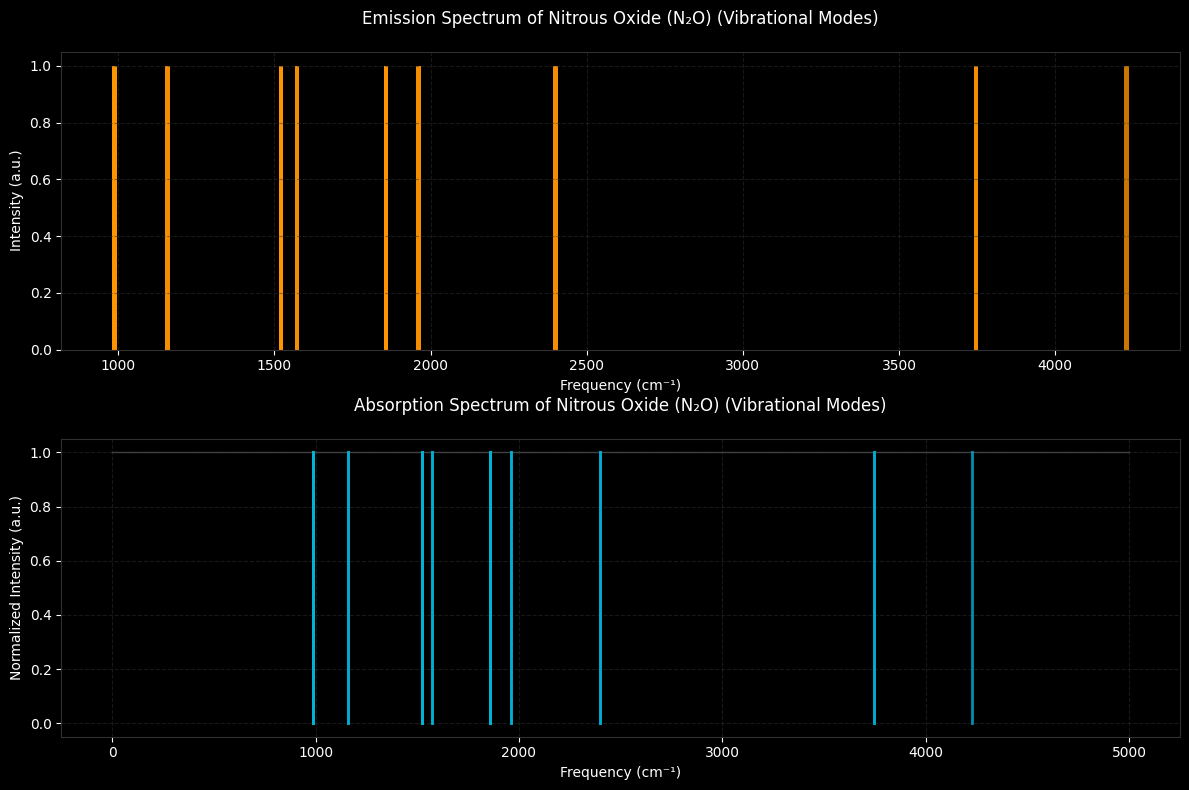

In [13]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)

mf = scf.RHF(mol)                                     # Perform a ground-state calculation for molecular vibrational frequencies
mf.kernel()
hess = hessian.RHF(mf).kernel()                       # Calculate the Hessian matrix (force constants)
frequencies = np.linalg.eigvalsh(hess)                # Diagonalize the Hessian to get vibrational frequencies
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Filter out non-physical (imaginary) frequencies and limit to realistic range

# Plot stlyes
EMISSION_COLOR = '#ff9500'  # Bright orange
ABSORPTION_COLOR = '#00b4d8'  # Bright blue
BASELINE_COLOR = '#404040'  # Dark gray
GRID_COLOR = '#303030'  # Slightly lighter gray for grid
plt.figure(figsize=(12, 8), facecolor='black') # Create figure with dark background
plt.style.use('dark_background') # Set the style to dark background

# Emission Spectrum
plt.subplot(2, 1, 1)
plt.bar(frequencies, height=1.0, width=15.0, color=EMISSION_COLOR, alpha=0.8)
plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Emission Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Absorption Spectrum
plt.subplot(2, 1, 2)
# Create baseline
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000),
         color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines with gradient effect
for freq in frequencies:
    y = np.linspace(0, 1, 100)
    x = np.ones_like(y) * freq
    plt.plot(x, y, color=ABSORPTION_COLOR,
            alpha=0.8, linewidth=2)

plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Normalized Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Absorption Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Set figure background to black
plt.gcf().patch.set_facecolor('black')

plt.show()